[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LjBLincoln/Machine_Learning/blob/master/wx+b.ipynb)

In [0]:
import tensorflow as tf
import numpy as np

MAX_STEPS = 600


#input module
with tf.name_scope('input'):
    # create data 生成100个0-1之间的随机数   np.random.rand(100) 1*100的矩阵
    #np.random.rand(3,3) 3*3的矩阵，其每个元素为0-1的随机数
    x_data = np.random.rand(10000).astype(np.float32)
    y_data = x_data * 0.2 + 0.5


# layer
with tf.name_scope('slayer'):
    with tf.name_scope('weights'):
        ### create tensorflow structure start ###对权进行赋值 在-1到一之间随机数
        #uniform([1]为1*1的矩阵，即一个数
        Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
        tf.summary.histogram('Weights' ,Weights)
    with tf.name_scope('biases'):
        #偏差为零，zeros([1]为一个1*1的零矩阵，即初始偏差为零
        biases = tf.Variable(tf.zeros([1]))
        tf.summary.histogram('biases' ,biases)
    with tf.name_scope('Wx_plus_b'):
        #权值与x相乘并加偏差
        y = Weights*x_data + biases 

#Mean Squared Error)
with tf.name_scope('Mean_Squared_Error'):
    #方差，(y-y_data)平方，求和，取均值
    loss = tf.reduce_mean(tf.square(y-y_data))
    tf.summary.scalar('loss', loss)

#Optimizer
with tf.name_scope('train'):
    #定义梯度下降法优化函数，优化，步长为0.5
    optimizer = tf.train.GradientDescentOptimizer(0.1)
    #tf.summary.scalar('optimizer', optimizer)
    train = optimizer.minimize(loss)
    
merged = tf.summary.merge_all()

init = tf.global_variables_initializer()
#session
sess = tf.Session()

#create FileWriter and loadd graph
train_writer = tf.summary.FileWriter('/tmp/tf-wx+b'+'/train', sess.graph)

sess.run(init)

for step in range(MAX_STEPS):
    sess.run(train)
    #train_writer.add_summary(summary, step)
    if step % 10 == 0:
        print(step, sess.run(Weights), sess.run(biases)) 

#close FileWriter
train_writer.close()
test_writer.close()
sess.close()

print("Done !!!")

In [0]:
import tensorflow as  tf

from tensorflow.examples.tutorials.mnist import input_data

#get MNIST data set
mnist = input_data.read_data_sets('/tmp/data/mnist', one_hot=True)
#input module
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, 784], name='x-input')
    y_ = tf.placeholder(tf.float32, [None, 10], name='y-input')
with tf.name_scope('input_reshape'):
    image_shaped_input = tf.reshape(x, [-1, 28, 28, 1])
    tf.summary.image('input', image_shaped_input, 10)

#softmax layer
with tf.name_scope('softmax_layer'):
    with tf.name_scope('weights'):
        weights = tf.Variable( tf.zeros( [ 784, 10 ] ) )
        tf.summary.histogram('weights' ,weights)
    with tf.name_scope('biases'):
        biases =  tf.Variable( tf.zeros( [ 10 ] ) )
        #tf.summary.histogram('biases' ,biases)
    with tf.name_scope('Wx_plus_b'):
        y = tf.matmul( x,  weights ) + biases

#cross entropy
with tf.name_scope('cross_entropy'):
    diff = tf.nn.softmax_cross_entropy_with_logits( labels=y_, logits= y)
    with tf.name_scope('total'):
        cross_entropy = tf.reduce_mean(diff)
        tf.summary.scalar('cross_entropy', cross_entropy)

#Optimizer
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

#accuracy
with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.arg_max(y, 1), tf.arg_max(y_, 1))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        tf.summary.scalar('accuracy', accuracy)
merged = tf.summary.merge_all()

# crate interactive session
sess = tf.InteractiveSession()

#create FileWriter and loadd graph
train_writer = tf.summary.FileWriter('/tmp/summary/mnist'+'/train', sess.graph)
test_writer = tf.summary.FileWriter('/tmp/summary/mnist'+'/test')
#init global variables
tf.global_variables_initializer().run()

def feed_dict(train):
    if train:
        xs, ys = mnist.train.next_batch(100, fake_data=False)
    else:
        xs, ys = mnist.test.images, mnist.test.labels
    return {x:xs, y_:ys}

for i in range(1000):
    if i %  10 == 0:
        summary, acc = sess.run([merged,accuracy], feed_dict=feed_dict(True))
        test_writer.add_summary(summary,i)
        print('Accuracy at step %s : %s ' % (i,acc ))
    else :
        if i % 100 == 99:
            run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
            run_metadata = tf.RunMetadata()
            summary, _ = sess.run([merged,train_step],
                                  feed_dict=feed_dict(False),
                                  options=run_options,
                                  run_metadata=run_metadata)
            train_writer.add_run_metadata(run_metadata, 'step%03d' % i)
            train_writer.add_summary(summary, i)
            print('Adding run metadata fro ', i)
        else:
            summary, _ = sess.run([merged, train_step] , feed_dict= feed_dict(True))
            train_writer.add_summary(summary, i)
#close FileWriter
train_writer.close()

test_writer.close()

sess.close()

print("Done !!!")

In [0]:
import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np


x_data = np.random.randn(100).astype(np.float32)
y_data = x_data*0.3 + 0.7

plt.title("scatter diagram.")
plt.xlabel("x_data")
plt.ylabel("y_data")
plt.xlim(xmax=1, xmin=0)
plt.ylim(ymax=1,ymin=0)
plt.plot(x_data,y_data,'ro')

plt.plot(y_data,x_data,'ro')
plt.show()

InvalidArgumentError: ignored

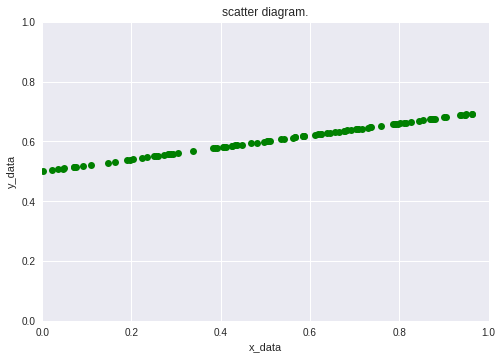

In [54]:
# _*_ coding: utf-8 _*_

import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np

MAX_STEPS = 100




#input module
with tf.name_scope('input'):
    # create data 生成100个0-1之间的随机数   np.random.rand(100) 1*100的矩阵
    #np.random.rand(3,3) 3*3的矩阵，其每个元素为0-1的随机数
    x_data = np.random.rand(100).astype(np.float32)
    y_data = x_data * 0.2 + 0.5


# layer
with tf.name_scope('slayer'):
    with tf.name_scope('x'):
        x = tf.placeholder(tf.float32, shape = (100), name = "x")
        y_ = tf.placeholder(tf.float32, shape = (100,None), name = "y")
    with tf.name_scope('weights'):
        ### create tensorflow structure start ###对权进行赋值 在-1到一之间随机数
        #uniform([1]为1*1的矩阵，即一个数
        Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
        tf.summary.histogram('Weights' ,Weights)
    with tf.name_scope('biases'):
        #偏差为零，zeros([1]为一个1*1的零矩阵，即初始偏差为零
        biases = tf.Variable(tf.zeros([1]))
        tf.summary.histogram('biases' ,biases)
    with tf.name_scope('Wx_plus_b'):
        #权值与x相乘并加偏差
        y = Weights * x + biases 

#Mean Squared Error)
with tf.name_scope('Mean_Squared_Error'):
    #方差，(y-y_data)平方，求和，取均值
    loss = tf.reduce_mean(tf.square(y-y_data))
    tf.summary.scalar('loss', loss)

#Optimizer
with tf.name_scope('train'):
    #定义梯度下降法优化函数，优化，步长为0.5
    optimizer = tf.train.GradientDescentOptimizer(0.1)
    #tf.summary.scalar('optimizer', optimizer)
    train = optimizer.minimize(loss)
    

merged = tf.summary.merge_all()

init = tf.global_variables_initializer()
#session
sess = tf.Session()

#create FileWriter and loadd graph
train_writer = tf.summary.FileWriter('/tmp/tf-wx+b'+'/train', sess.graph)

sess.run(init)

plt.ion()
plt.cla()
plt.title("scatter diagram.")
plt.xlabel("x_data")
plt.ylabel("y_data")
plt.xlim(xmax=1, xmin=0)
plt.ylim(ymax=1,ymin=0)
plt.plot(x_data,y_data,'ro',color='g')

for step in range(MAX_STEPS):
    run_metadata = tf.RunMetadata()
    y_re,t,w,b = sess.run([y,train,Weights,biases],feed_dict = { x: x_data})
    print(y_re)
    train_writer.add_summary(summary, step)

    if step % 10 == 0:
        print(step,w,b)
    plt.plot(x_data,y_re,'ro', color='r')  
    plt.pause(0.1)
    
plt.ioff()
plt.show()
    
#close FileWriter
train_writer.close()
test_writer.close()
sess.close()

print("Done !!!")